# Interpolation

## Newton's divided difference method

In [4]:
import numpy as np

In [10]:
n = int(input("Enter the number of data points:",))

X = np.zeros((n))
Y = np.zeros((n))

for i in range(n):
        j = i
        X[i] = float(input("Enter x["+str(i)+"]:"))
        Y[j] = float(input("Enter y["+str(j)+"]:")) 
        
print(X,Y, len(X))  

Enter the number of data points:6
Enter x[0]:5
Enter y[0]:45
Enter x[1]:10
Enter y[1]:105
Enter x[2]:15
Enter y[2]:174
Enter x[3]:20
Enter y[3]:259
Enter x[4]:25
Enter y[4]:364
Enter x[5]:30
Enter y[5]:496
[ 5. 10. 15. 20. 25. 30.] [ 45. 105. 174. 259. 364. 496.] 6


In [27]:
# Calcuate the coefficients.

def coefficient(x,y):
    
    n = len(x)
    
    f = np.zeros((n,n))    
    
    for i in range(n):
        f[i][0] = y[i]
        
    for j in range(1, n):
        for i in range(n-j):
            f[i][j] = (f[i+1][j-1] - f[i][j-1]) / (x[i+j] - x[i])
    
    return f


# compute the desired f(x) at given x.            
 
def interpolate(coef, xdata , xnew):
    
    R = coef[0][0]
    
    for j in range(1, n):
        P = coef[0][j]
        for i in range(j):
            P = P * (xnew - xdata[i])
        R = R + P
        
    return R

In [43]:
a = coefficient(X,Y)

print(a)

xnew = np.array([7,8,11,14,16,22,28,29])
c=interpolate(a,X,xnew)
print(c)

[[ 4.50000000e+01  1.20000000e+01  1.80000000e-01  9.33333333e-03
  -2.00000000e-04  1.60000000e-05]
 [ 1.05000000e+02  1.38000000e+01  3.20000000e-01  5.33333333e-03
   2.00000000e-04  0.00000000e+00]
 [ 1.74000000e+02  1.70000000e+01  4.00000000e-01  9.33333333e-03
   0.00000000e+00  0.00000000e+00]
 [ 2.59000000e+02  2.10000000e+01  5.40000000e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.64000000e+02  2.64000000e+01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.96000000e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[ 68.672512  80.549888 117.764416 159.062784 189.586816 298.339712
 439.207488 466.849984]


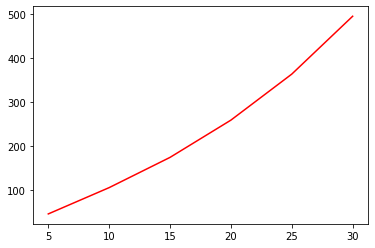

In [49]:
import matplotlib.pyplot as plt
plt.plot(X,Y, color = 'r')

[ 5. 10. 15. 20. 25. 30.  7.  8. 11. 14. 16. 22. 28. 29.] [ 45.       105.       174.       259.       364.       496.
  68.672512  80.549888 117.764416 159.062784 189.586816 298.339712
 439.207488 466.849984]


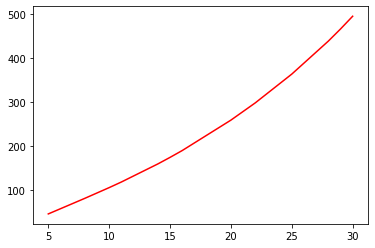

In [57]:
x_n = np.concatenate((X,xnew))
y_n = np.concatenate((Y,c))
print(x_n, y_n)
plt.plot(np.sort(x_n), np.sort(y_n), color = 'r')

### Concatenation

In [54]:
x = np.array([[1,2], [3,4]])
y = np.array([[5,6], [7,8]])
print(x)
print(y)

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]


In [52]:
np.concatenate((x,y), axis =1)

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

In [55]:
np.concatenate((x,y), axis =0)

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

## Lagrange Interpolation

In [5]:
n = int(input("Enter the number of data points:",))

X = np.zeros((n))
Y = np.zeros((n))

for i in range(n):
        j = i
        X[i] = float(input("Enter x["+str(i)+"]:"))
        Y[j] = float(input("Enter y["+str(j)+"]:")) 
        
print(X,Y, len(X))  

Enter the number of data points:6
Enter x[0]:5
Enter y[0]:45
Enter x[1]:10
Enter y[1]:105
Enter x[2]:15
Enter y[2]:174
Enter x[3]:20
Enter y[3]:259
Enter x[4]:25
Enter y[4]:364
Enter x[5]:30
Enter y[5]:496
[ 5. 10. 15. 20. 25. 30.] [ 45. 105. 174. 259. 364. 496.] 6


In [6]:
def lagrange_intp(x,y,xp):
    n = len(x)
    s = 0
    for i in range(n):
        L = 1.0
        for j in range(n):
            
            if i != j:
                L = L * (xp-x[j])/(x[i] - x[j])
                
        s = s + L * y[i]   
    
    return s               

In [8]:
xnew = np.array([7,8,11,14,16,22,28,29])
result = lagrange_intp(X,Y,xnew)
print(result)

[ 68.672512  80.549888 117.764416 159.062784 189.586816 298.339712
 439.207488 466.849984]


Result from Newton's method: [ 68.672512,  80.549888, 117.764416, 159.062784, 189.586816, 298.339712,
 439.207488, 466.849984]